In [1]:
from tensorflow import keras
import os
import numpy as np
from multiprocessing import Queue, Pipe

In [4]:
r, s = Pipe()

In [9]:
s.send('meow')
s.send('woof')


In [10]:
r.poll()

True

In [11]:
r.recv()

'meow'

In [40]:
m1 = keras.models.load_model("src/0.h5")

In [29]:
ws = []
ws.append(keras.models.load_model("src/0.h5"))
ws.append(keras.models.load_model("src/1.h5"))
ws.append(keras.models.load_model("src/2.h5"))
ws.append(keras.models.load_model("src/3.h5"))
ws.append(keras.models.load_model("src/4.h5"))


In [38]:
N = len(ws[0].trainable_weights)

In [41]:
ws[0].trainable_weights[0].shape

TensorShape([25, 320])

In [46]:
k = keras.backend.zeros(ws[0].trainable_weights[0].shape)
k

<tf.Variable 'Variable:0' shape=(25, 320) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [52]:
m1.

5

In [51]:
for i in range(N):
    tns = k = keras.backend.zeros(m1.trainable_weights[i].shape)
    for w in ws:
        tns = tns + w.trainable_weights[i]
    print(tns/len(ws))

tf.Tensor(
[[-0.0495315   0.02656956  0.06088061 ...  0.10874565  0.02280644
   0.12040124]
 [-0.12018161  0.05493975  0.03167654 ...  0.04626288  0.03649011
   0.05029715]
 [ 0.11864664 -0.15647191 -0.00725044 ... -0.12071238 -0.06796978
  -0.01271861]
 ...
 [-0.09554102 -0.14377083  0.0472725  ...  0.0321319   0.04203013
   0.09133203]
 [ 0.06467141  0.10404609  0.05639338 ... -0.05431012  0.03558454
   0.07286088]
 [-0.0499787  -0.07327107  0.08109644 ...  0.07588235 -0.09323244
   0.04384843]], shape=(25, 320), dtype=float32)
tf.Tensor(
[[-0.03307261 -0.04007778 -0.06826801 ... -0.07542673 -0.05133299
  -0.02042329]
 [ 0.01125011  0.0112951   0.02438165 ... -0.00266319  0.12964591
  -0.0037258 ]
 [-0.00605077  0.10780893  0.10393295 ...  0.02809061  0.0190224
   0.04355882]
 ...
 [ 0.00888002 -0.02610393  0.02904529 ...  0.03300832 -0.04105639
   0.07394928]
 [-0.03019165 -0.00561561 -0.01497181 ... -0.04732461 -0.02521504
   0.00576848]
 [-0.15658566 -0.09162029 -0.03520878 ...  0

In [24]:
m2.trainable_weights[0]

<tf.Variable 'lstm/lstm_cell_4/kernel:0' shape=(25, 320) dtype=float32, numpy=
array([[-0.05777114,  0.02070099,  0.05972867, ...,  0.10867368,
         0.02261568,  0.11391   ],
       [-0.12400442,  0.05663622,  0.02094842, ...,  0.05881907,
         0.04616613,  0.04598952],
       [ 0.11427292, -0.1562253 , -0.01507393, ..., -0.11593919,
        -0.05745689, -0.01109733],
       ...,
       [-0.11891405, -0.15152736,  0.02766264, ...,  0.0432107 ,
         0.05328213,  0.08673976],
       [ 0.06467141,  0.10404609,  0.05639338, ..., -0.05431012,
         0.03558454,  0.07286088],
       [-0.0499787 , -0.07327107,  0.08109644, ...,  0.07588235,
        -0.09323244,  0.04384843]], dtype=float32)>

In [22]:
(m1.trainable_weights[0] + m2.trainable_weights[0])/2


<tf.Tensor: shape=(25, 320), dtype=float32, numpy=
array([[-0.05040954,  0.02314585,  0.05901466, ...,  0.10865043,
         0.02429411,  0.12093915],
       [-0.12461529,  0.0544502 ,  0.02591605, ...,  0.0507201 ,
         0.03936695,  0.04893526],
       [ 0.10746981, -0.15721169, -0.00760722, ..., -0.11945802,
        -0.06586783, -0.01456738],
       ...,
       [-0.11155704, -0.1483685 ,  0.04137009, ...,  0.03670996,
         0.04677727,  0.09191164],
       [ 0.06467141,  0.10404609,  0.05639338, ..., -0.05431012,
         0.03558454,  0.07286088],
       [-0.0499787 , -0.07327107,  0.08109644, ...,  0.07588235,
        -0.09323244,  0.04384843]], dtype=float32)>

In [20]:
m2.trainable_weights[0].shape

TensorShape([25, 320])

In [56]:
!pip install --quiet --upgrade tensorflow-federated
!pip install --quiet --upgrade nest-asyncio

You should consider upgrading via the '/Users/juanrodriguez/git/GF/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/juanrodriguez/git/GF/venv/bin/python -m pip install --upgrade pip' command.


In [57]:
import nest_asyncio
nest_asyncio.apply()

In [58]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [62]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

OSError: [Errno 8] Exec format error: '/Users/juanrodriguez/git/GF/venv/lib/python3.9/site-packages/tensorflow_federated/python/core/backends/native/../../../../data/worker_binary'

In [63]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

In [64]:
len(emnist_train.client_ids)

3383

In [65]:
emnist_train.element_type_structure


OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])

In [66]:
example_dataset = emnist_train.create_tf_dataset_for_client(
    emnist_train.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

1

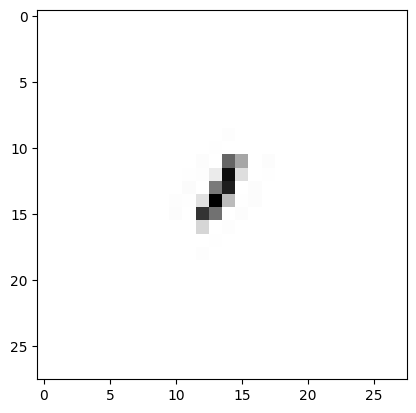

In [67]:
from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()

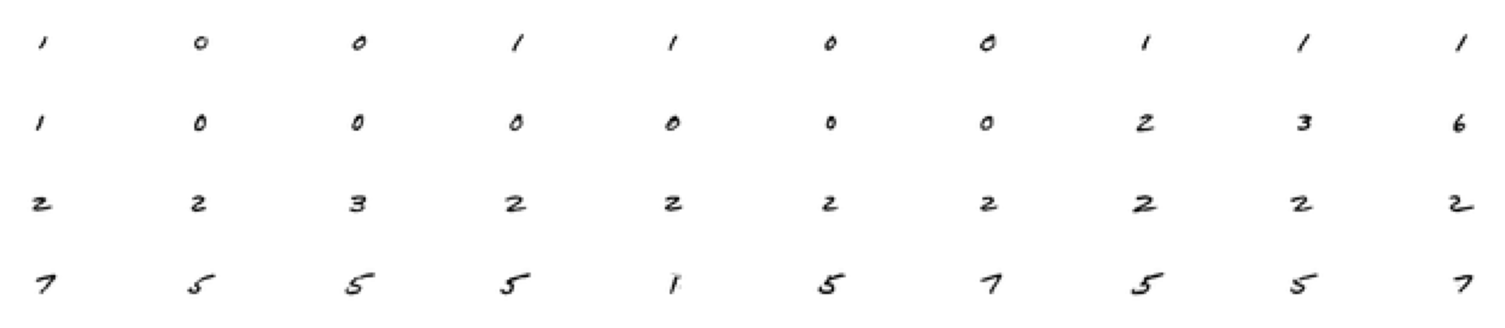

In [68]:
## Example MNIST digits for one client
figure = plt.figure(figsize=(20, 4))
j = 0

for example in example_dataset.take(40):
  plt.subplot(4, 10, j+1)
  plt.imshow(example['pixels'].numpy(), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

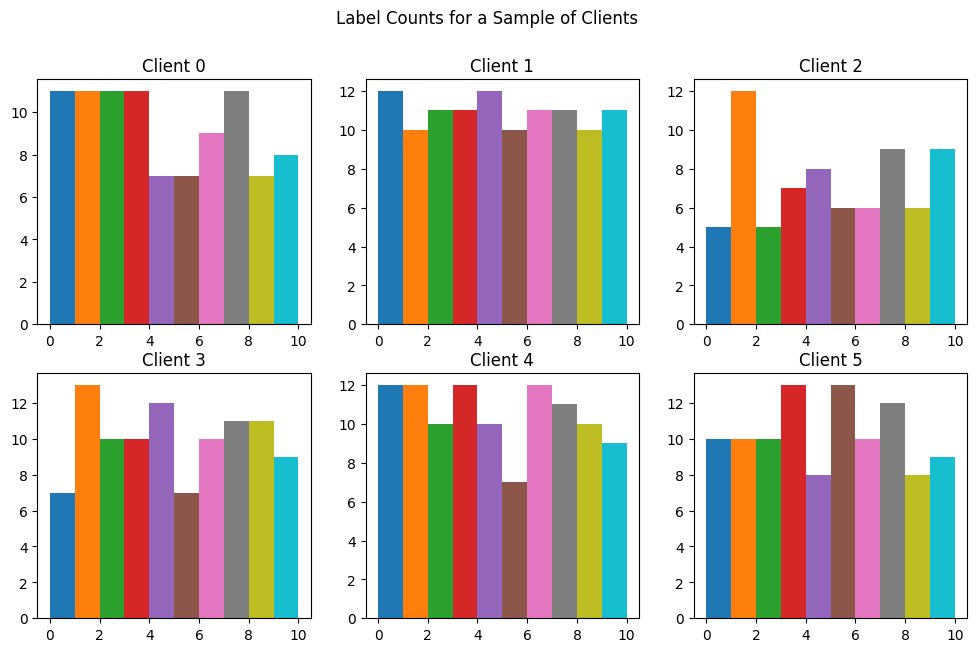

In [69]:
# Number of examples per layer for a sample of clients
f = plt.figure(figsize=(12, 7))
f.suptitle('Label Counts for a Sample of Clients')
for i in range(6):
  client_dataset = emnist_train.create_tf_dataset_for_client(
      emnist_train.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    # Append counts individually per label to make plots
    # more colorful instead of one color per plot.
    label = example['label'].numpy()
    plot_data[label].append(label)
  plt.subplot(2, 3, i+1)
  plt.title('Client {}'.format(i))
  for j in range(10):
    plt.hist(
        plot_data[j],
        density=False,
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [113]:
m3= keras.models.Sequential()
m3.add(keras.layers.Dense(2, input_shape=(5,1)))
m3.compile(loss='binary_crossentropy')
m3.layers

In [78]:
import numpy as np

In [103]:
x = np.random.random((100,5,1))
y = np.random.random((100,5,2))


In [105]:
m2.fit(x,y, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 4.2561
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 4.2419
Epoch 3/10
4/4 [==============================] - 0s 1ms/step - loss: 4.2359
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 4.2310
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 4.2257
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 4.2221
Epoch 7/10
4/4 [==============================] - 0s 1ms/step - loss: 4.2186
Epoch 8/10
4/4 [==============================] - 0s 1ms/step - loss: 4.2156
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 4.2126
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 4.2095


In [107]:
m2.trainable_weights

[<tf.Variable 'dense_10/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-0.30151045,  0.58684987]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([0.        , 0.04029769], dtype=float32)>]

In [102]:
m.trainable_weights

[<tf.Variable 'dense_9/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[0.03894218, 0.47517982]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(2,) dtype=float32, numpy=array([0.01984887, 0.04256795], dtype=float32)>]

In [112]:
(-0.30151045 + 0.03894218)/2

-0.131284135

In [110]:
s = [m, m2]

In [108]:
def get_fed_avg(ws):
    n_layers = len(ws[0].trainable_weights)
    agg_layers = []
    for i in range(n_layers):
        tns = k = keras.backend.zeros(ws[0].trainable_weights[i].shape)
        for w in ws:
            tns = tns + w.trainable_weights[i]
        agg_layers.append(tns / len(ws))
    return agg_layers

In [115]:
m3.trainable_weights

[<tf.Variable 'dense_11/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-0.51435137, -0.3519336 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [116]:
x = get_fed_avg(s)
print(x)
m3.trainable_weights.append(x)
print(m3.trainable_weights)

[<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.13128413,  0.53101486]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.00992443, 0.04143282], dtype=float32)>]
[<tf.Variable 'dense_11/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-0.51435137, -0.3519336 ]], dtype=float32)>, <tf.Variable 'dense_11/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]


In [117]:
m3.trainable_weights[0].assign(x[0])

<tf.Variable 'UnreadVariable' shape=(1, 2) dtype=float32, numpy=array([[-0.13128413,  0.53101486]], dtype=float32)>

In [2]:
from multiprocessing import Pipe, Queue

y = Queue()

In [2]:
class dmy:
    def __init__(self, cn):
        self.cn = cn
        

In [3]:
y.empty()

True

In [ ]:
class Msg:
    def __init__(self, to, frm, data):
        self.to = to
        self.frm = frm
        self.data = data

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_after_fork',
 '_buffer',
 '_close',
 '_closed',
 '_feed',
 '_finalize_close',
 '_finalize_join',
 '_ignore_epipe',
 '_joincancelled',
 '_jointhread',
 '_maxsize',
 '_notempty',
 '_on_queue_feeder_error',
 '_opid',
 '_poll',
 '_reader',
 '_recv_bytes',
 '_reset',
 '_rlock',
 '_sem',
 '_send_bytes',
 '_start_thread',
 '_thread',
 '_wlock',
 '_writer',
 'cancel_join_thread',
 'close',
 'empty',
 'full',
 'get',
 'get_nowait',
 'join_thread',
 'put',
 'put_nowait',
 'qsize']

In [9]:
from json import dumps, loads

In [19]:
q = Queue()
q.put({3: 2, 'a': 8})

In [20]:
q.get()

{3: 2, 'a': 8}

In [2]:
def test(q):
    print(q.empty())


In [5]:
!pwd

/home/jmeow/git/Galactic-Federation


In [9]:
from kubePilot.shared.burst_connection import Msg

In [ ]:
d = 'a'

for i in d:
    print(d)